In [ ]:
%cd /content/drive/MyDrive/CSE444/

/content/drive/MyDrive/CSE444


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score , plot_confusion_matrix , plot_roc_curve ,plot_precision_recall_curve , classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

pd.set_option('display.max_columns', 22)


In [ ]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.shape

(253680, 22)

In [ ]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

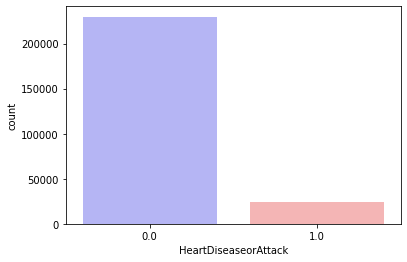

In [ ]:
sns.countplot(x="HeartDiseaseorAttack", data=df, palette="bwr")
plt.show()

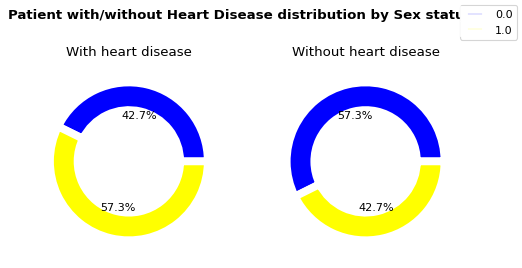

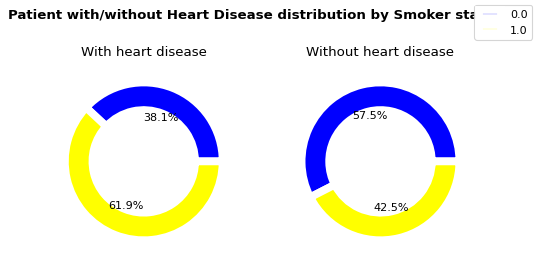

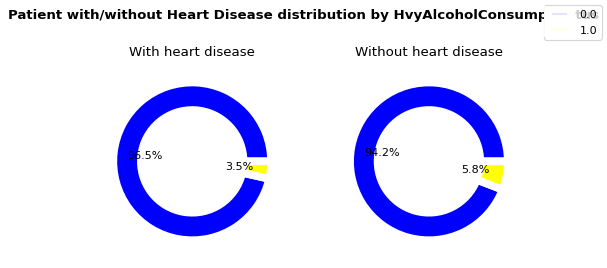

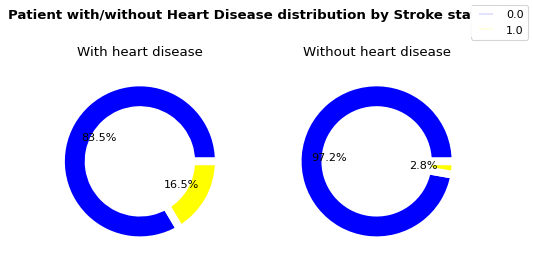

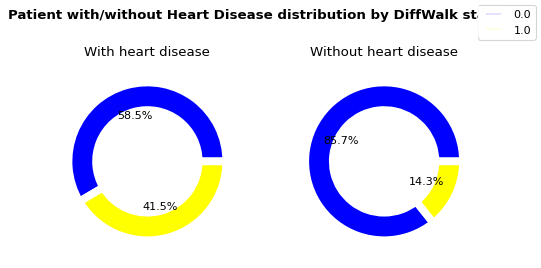

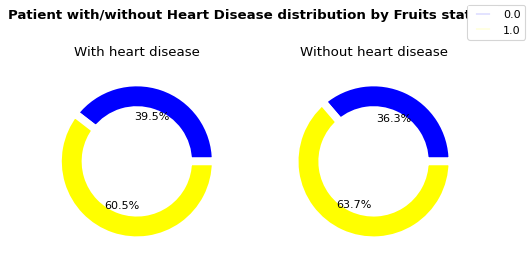

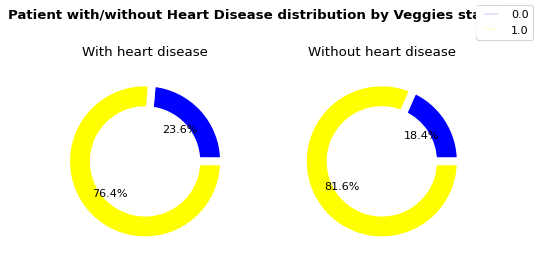

In [ ]:
from matplotlib import colors as c

binary_cols = ['HeartDiseaseorAttack','Sex','Smoker','HvyAlcoholConsump','Stroke', 'DiffWalk','Fruits','Veggies']


for i in range(1, len(binary_cols)):
    fig = plt.figure(figsize=(7,4), dpi=80)
    
    ax1 = plt.subplot(1,2,1)
    df[df['HeartDiseaseorAttack'] == 1].groupby(df[binary_cols[i]]).HeartDiseaseorAttack.count().plot(kind='pie', colors= ["#0000FF", "#FFFF00"], autopct='%.1f%%', labeldistance=None,
                                                                                        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width':0.35 })
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title("With heart disease")
    
    ax2 = plt.subplot(1,2,2)
    df[df['HeartDiseaseorAttack'] == 0].groupby(df[binary_cols[i]]).HeartDiseaseorAttack.count().plot(kind='pie',  colors= ["#0000FF", "#FFFF00"], autopct='%.1f%%', labeldistance=None,
                                                                                     wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width':0.35 })
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title("Without heart disease")
    plt.suptitle("Patient with/without Heart Disease distribution by " + binary_cols[i] + " status", fontweight='bold')
    
    handles, labels = ax1.get_legend_handles_labels()
        
    leg = fig.legend(handles, labels, loc = 'upper right', fancybox=True)
    
        
    plt.subplots_adjust(right=0.9)
    plt.show()

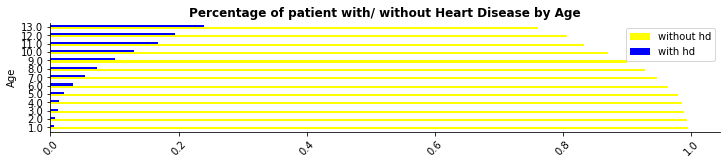

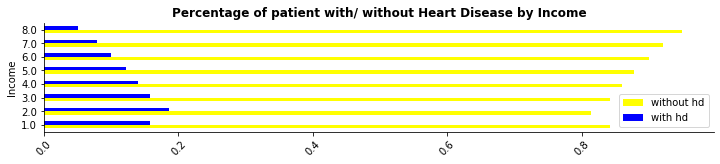

In [ ]:
cat_cols = ['Age','Income']


for i in range(0, len(cat_cols)):
    crosstb = pd.crosstab(df[cat_cols[i]], df.HeartDiseaseorAttack)
    crosstb['without_hd_percent'] = crosstb[0] / (crosstb[0] + crosstb[1])
    crosstb['with_hd_percent'] = crosstb[1] / (crosstb[0] + crosstb[1])
    
    crosstb = crosstb.drop([1, 0], axis = 1)
    
    crosstb.plot(kind='barh', color=["#FFFF00", "#0000FF"])
    sns.despine()
    labels = ["without hd","with hd"]
    plt.gcf().set_size_inches(12, 2)
    plt.xticks(rotation = 45)
    plt.legend(labels=labels)
    plt.title("Percentage of patient with/ without Heart Disease by " + cat_cols[i], fontweight='bold')
    plt.show()

In [ ]:
countNoDisease = len(df[df.HeartDiseaseorAttack == 0])
countHaveDisease = len(df[df.HeartDiseaseorAttack == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.HeartDiseaseorAttack))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.HeartDiseaseorAttack))*100)))

Percentage of Patients Haven't Heart Disease: 90.58%
Percentage of Patients Have Heart Disease: 9.42%


In [ ]:
countFemale = len(df[df.Sex == 0])
countMale = len(df[df.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Sex))*100)))

Percentage of Female Patients: 55.97%
Percentage of Male Patients: 44.03%


In [ ]:
diseaseOnes = df['HeartDiseaseorAttack'] == 1
dfOnes = df[diseaseOnes]

diseasesZeros = df['HeartDiseaseorAttack'] == 0
dfZeros = df[diseasesZeros] 

dfRandomZeros = dfZeros.take(np.random.permutation(len(dfZeros))[:23893])
dfHalf = dfRandomZeros.append(dfOnes, ignore_index = True)
dfHalf

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0
1,0.0,0.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,5.0,0.0,0.0,0.0,4.0,6.0,7.0
2,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,21.0,21.0,0.0,0.0,8.0,5.0,1.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,7.0
4,0.0,0.0,1.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47781,1.0,0.0,1.0,1.0,29.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
47782,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
47783,1.0,1.0,1.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0
47784,1.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0


In [ ]:
dfHalf.HeartDiseaseorAttack.value_counts()

0.0    23893
1.0    23893
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
df6040RandomOnes = dfZeros.take(np.random.permutation(len(dfZeros))[:47786])
df6040 = df6040RandomOnes.append(dfOnes, ignore_index = True)

df6040

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0
1,0.0,1.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,5.0
2,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,5.0,8.0
3,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,0.0,0.0,0.0,7.0,6.0,7.0
4,0.0,0.0,0.0,1.0,33.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71674,1.0,0.0,1.0,1.0,29.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
71675,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
71676,1.0,1.0,1.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0
71677,1.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0


In [ ]:
df6040.HeartDiseaseorAttack.value_counts()

0.0    47786
1.0    23893
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
def splitData(df):
  X = df.drop(columns='HeartDiseaseorAttack')
  y = pd.DataFrame(df['HeartDiseaseorAttack'])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  return X_train,X_test,y_train,y_test

In [ ]:
X_train_imbalance,X_test_imbalance,y_train_imbalance,y_test_imbalance = splitData(df)
X_train_half,X_test_half,y_train_half,y_test_half = splitData(dfHalf)
X_train_60_40,X_test_60_40,y_train_60_40,y_test_60_40 = splitData(df6040)

In [ ]:
X = df.drop(columns='HeartDiseaseorAttack')
y = pd.DataFrame(df['HeartDiseaseorAttack'])
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = undersample.fit_resample(X, y)
X_train_not_imbalance, X_test_not_imbalance, y_train_not_imbalance, y_test_not_imbalance = train_test_split(X_under, y_under, test_size=0.20, random_state=101)

In [ ]:
def neuralNetworkModel(X_train,X_test,y_train,y_test):

  model = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation = 'relu'),
  tf.keras.layers.Dense(4,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')
  ])


  model.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])
  print(X_train.shape,y_train.shape)

  history = model.fit(X_train,y_train,epochs = 100)

  model.evaluate(X_test,y_test)

In [ ]:
print("Imbalance Dataset Neural Network")
neuralNetworkModel(X_train_imbalance,X_test_imbalance,y_train_imbalance,y_test_imbalance)

Imbalance Dataset Neural Network


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


(190260, 21) (190260, 1)
Epoch 1/100
5946/5946 [==============================] - 21s 3ms/step - loss: 0.3730 - accuracy: 0.8932
Epoch 2/100
5946/5946 [==============================] - 10s 2ms/step - loss: 0.2511 - accuracy: 0.9056
Epoch 3/100
5946/5946 [==============================] - 10s 2ms/step - loss: 0.2462 - accuracy: 0.9056
Epoch 4/100
5946/5946 [==============================] - 10s 2ms/step - loss: 0.2445 - accuracy: 0.9056
Epoch 5/100
5946/5946 [==============================] - 10s 2ms/step - loss: 0.2433 - accuracy: 0.9056
Epoch 6/100
5946/5946 [==============================] - 11s 2ms/step - loss: 0.2422 - accuracy: 0.9056
Epoch 7/100
5946/5946 [==============================] - 10s 2ms/step - loss: 0.2416 - accuracy: 0.9056
Epoch 8/100
5946/5946 [==============================] - 10s 2ms/step - loss: 0.2410 - accuracy: 0.9056
Epoch 9/100
5946/5946 [==============================] - 10s 2ms/step - loss: 0.2404 - accuracy: 0.9056
Epoch 10/100
5946/5946 [===============

In [ ]:
print("50 50 Dataset Neural Network")
neuralNetworkModel(X_train_half,X_test_half,y_train_half,y_test_half)

50 50 Dataset Neural Network
(35839, 21) (35839, 1)
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1120/1120 [==============================] - 4s 3ms/step - loss: 0.6674 - accuracy: 0.5900
Epoch 2/100
1120/1120 [==============================] - 4s 4ms/step - loss: 0.5434 - accuracy: 0.7388
Epoch 3/100
1120/1120 [==============================] - 4s 4ms/step - loss: 0.5226 - accuracy: 0.7480
Epoch 4/100
1120/1120 [==============================] - 4s 4ms/step - loss: 0.5154 - accuracy: 0.7518
Epoch 5/100
1120/1120 [==============================] - 5s 4ms/step - loss: 0.5124 - accuracy: 0.7531
Epoch 6/100
1120/1120 [==============================] - 4s 4ms/step - loss: 0.5101 - accuracy: 0.7554
Epoch 7/100
1120/1120 [==============================] - 2s 2ms/step - loss: 0.5087 - accuracy: 0.7555
Epoch 8/100
1120/1120 [==============================] - 2s 2ms/step - loss: 0.5076 - accuracy: 0.7563
Epoch 9/100
1120/1120 [==============================] - 2s 2ms/step - loss: 0.5069 - accuracy: 0.7570
Epoch 10/100
1120/1120 [==============================] - 2s 2ms/step - loss: 0.5062 

In [ ]:
print("60 40 Dataset Neural Network")
neuralNetworkModel(X_train_60_40,X_test_60_40,y_train_60_40,y_test_60_40)

60 40 Dataset Neural Network
(53759, 21) (53759, 1)
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1680/1680 [==============================] - 4s 2ms/step - loss: 1.0407 - accuracy: 0.6499
Epoch 2/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4881 - accuracy: 0.7504
Epoch 3/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4665 - accuracy: 0.7641
Epoch 4/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4620 - accuracy: 0.7687
Epoch 5/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4598 - accuracy: 0.7694
Epoch 6/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4589 - accuracy: 0.7708
Epoch 7/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4578 - accuracy: 0.7715
Epoch 8/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4570 - accuracy: 0.7728
Epoch 9/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4561 - accuracy: 0.7741
Epoch 10/100
1680/1680 [==============================] - 3s 2ms/step - loss: 0.4556 

In [ ]:
print("Not Imbalance Dataset Neural Network")
neuralNetworkModel(X_train_not_imbalance, X_test_not_imbalance, y_train_not_imbalance, y_test_not_imbalance)

Not Imbalance Dataset Neural Network
(57343, 21) (57343, 1)
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1792/1792 [==============================] - 4s 2ms/step - loss: 0.5308 - accuracy: 0.7248
Epoch 2/100
1792/1792 [==============================] - 3s 2ms/step - loss: 0.4783 - accuracy: 0.7615
Epoch 3/100
1792/1792 [==============================] - 3s 2ms/step - loss: 0.4680 - accuracy: 0.7656
Epoch 4/100
1792/1792 [==============================] - 3s 2ms/step - loss: 0.4643 - accuracy: 0.7664
Epoch 5/100
1792/1792 [==============================] - 3s 2ms/step - loss: 0.4623 - accuracy: 0.7674
Epoch 6/100
1792/1792 [==============================] - 3s 2ms/step - loss: 0.4605 - accuracy: 0.7699
Epoch 7/100
1792/1792 [==============================] - 3s 2ms/step - loss: 0.4592 - accuracy: 0.7700
Epoch 8/100
1792/1792 [==============================] - 3s 2ms/step - loss: 0.4585 - accuracy: 0.7706
Epoch 9/100
1792/1792 [==============================] - 3s 2ms/step - loss: 0.4572 - accuracy: 0.7710
Epoch 10/100
1792/1792 [==============================] - 3s 2ms/step - loss: 0.4564 

In [ ]:
def knn_model(X_train,X_test,y_train,y_test): 
  test_error_rate = []
  y_train = y_train.values.reshape(-1,1)
  y_test = y_test.values.reshape(-1,1)

  for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors = k )
    knn_model.fit(X_train , y_train)
    y_pred = knn_model.predict(X_test)
    error = 1 - accuracy_score(y_test , y_pred)
    
    test_error_rate.append(error)
  print(test_error_rate)

  knn_model = KNeighborsClassifier(n_neighbors=test_error_rate.index(min(test_error_rate)))
  knn_model.fit(X_train , y_train)
  y_pred = knn_model.predict(X_test)

  y_pred = knn_model.predict(X_test)
  print(classification_report(y_test,y_pred))
  plot_confusion_matrix(knn_model , X_test , y_test)
  plot_roc_curve(knn_model , X_test , y_test)
  plot_precision_recall_curve(knn_model , X_test , y_test)

Imbalanced Dataset KNN MODEL


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.14131188899400815, 0.10017344686218854, 0.11236203090507724, 0.09831283506780197, 0.10280668558814254, 0.0965468306527909, 0.09845474613686533, 0.0953800063071586, 0.09643645537685275]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     57484
         1.0       0.38      0.08      0.14      5936

    accuracy                           0.90     63420
   macro avg       0.65      0.53      0.54     63420
weighted avg       0.86      0.90      0.87     63420



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

None


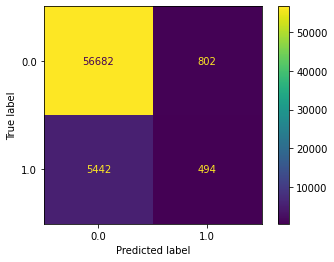

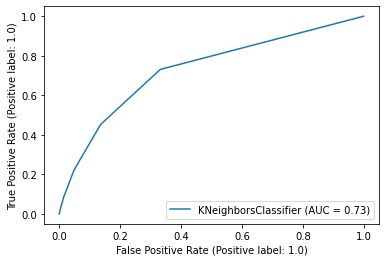

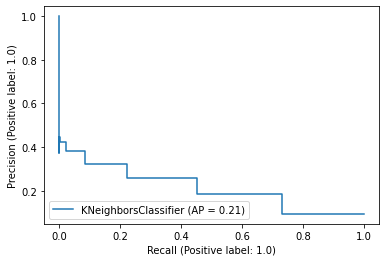

In [ ]:
print("Imbalanced Dataset KNN MODEL")
print(knn_model(X_train_imbalance,X_test_imbalance,y_train_imbalance,y_test_imbalance))

50 50 Dataset KNN MODEL


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.3335565413911442, 0.3534778605507659, 0.29907089645936213, 0.3122122708629782, 0.2857621160123881, 0.2912865154432075, 0.2765547836276889, 0.28157696492843387, 0.2693563237632879]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72      5953
         1.0       0.73      0.69      0.71      5994

    accuracy                           0.72     11947
   macro avg       0.72      0.72      0.72     11947
weighted avg       0.72      0.72      0.72     11947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

None


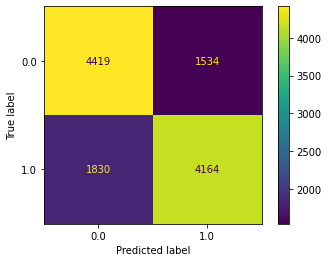

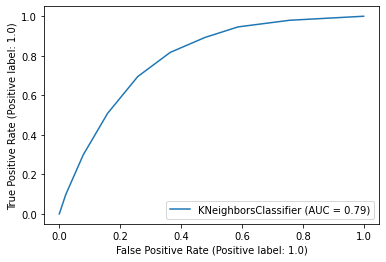

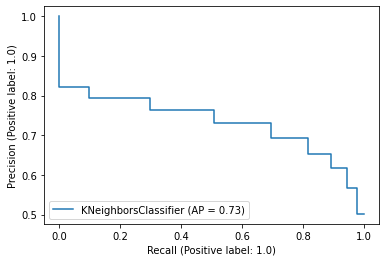

In [ ]:
print("50 50 Dataset KNN MODEL")
print(knn_model(X_train_half,X_test_half,y_train_half,y_test_half))

60 40 Dataset KNN MODEL


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.3095424107142857, 0.29458705357142856, 0.27840401785714286, 0.2806919642857143, 0.26835937499999996, 0.2688616071428571, 0.2640625, 0.26930803571428574, 0.26171875]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81     11971
         1.0       0.63      0.45      0.53      5949

    accuracy                           0.73     17920
   macro avg       0.70      0.66      0.67     17920
weighted avg       0.72      0.73      0.72     17920



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

None


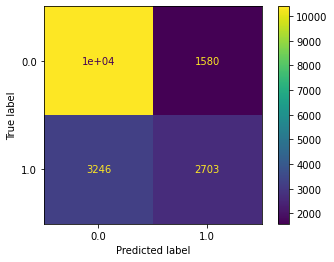

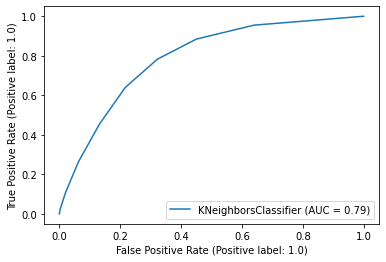

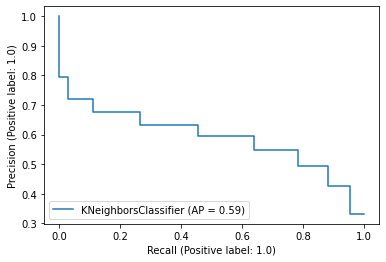

In [ ]:
print("60 40 Dataset KNN MODEL")
print(knn_model(X_train_60_40,X_test_60_40,y_train_60_40,y_test_60_40))

Not Imbalance Dataset Neural Network


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.3101981026785714, 0.2953404017857143, 0.2823660714285714, 0.2820870535714286, 0.2727399553571429, 0.2731584821428571, 0.26611328125, 0.2669503348214286, 0.2582310267857143]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.77      0.87      0.81      9594
         1.0       0.63      0.46      0.53      4742

    accuracy                           0.73     14336
   macro avg       0.70      0.66      0.67     14336
weighted avg       0.72      0.73      0.72     14336



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

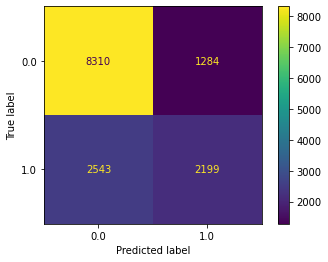

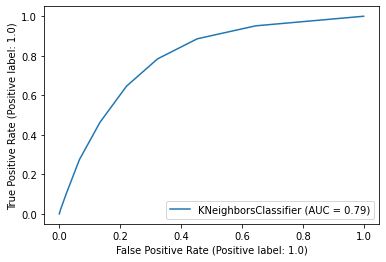

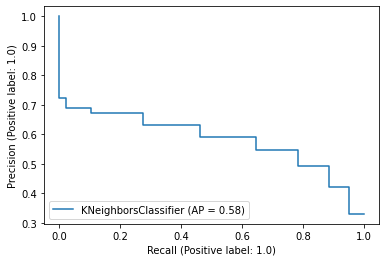

In [ ]:
print("Not Imbalance Dataset KNN model")
knn_model(X_train_not_imbalance, X_test_not_imbalance, y_train_not_imbalance, y_test_not_imbalance)

In [ ]:
def random_forest_classifier(X_train,X_test,y_train,y_test):
  rfc = RandomForestClassifier().fit(X_train, y_train)
  y_pred = rfc.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print(classification_report(y_test,y_pred))
  plot_confusion_matrix(rfc , X_test , y_test)
  plot_roc_curve(rfc , X_test , y_test)
  plot_precision_recall_curve(rfc , X_test , y_test)

Imbalanced Dataset RANDOM FOREST CLASSIFIER


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     57484
         1.0       0.42      0.11      0.18      5936

    accuracy                           0.90     63420
   macro avg       0.67      0.55      0.56     63420
weighted avg       0.87      0.90      0.88     63420



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

None


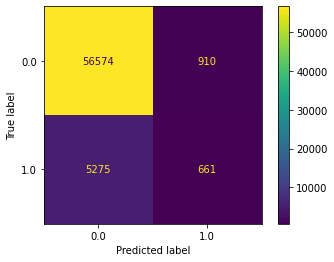

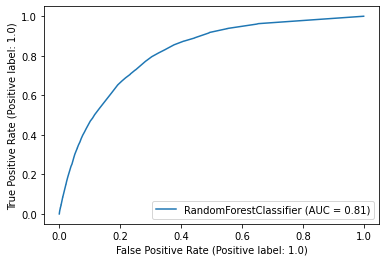

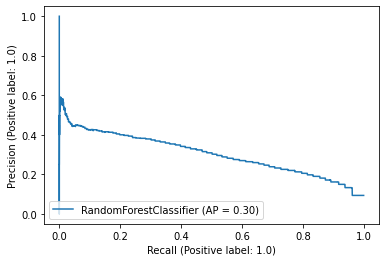

In [ ]:
print("Imbalanced Dataset RANDOM FOREST CLASSIFIER")
print(random_forest_classifier(X_train_imbalance,X_test_imbalance,y_train_imbalance,y_test_imbalance))

50 50 Dataset RANDOM FOREST CLASSIFIER


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      5953
         1.0       0.74      0.80      0.77      5994

    accuracy                           0.76     11947
   macro avg       0.76      0.76      0.76     11947
weighted avg       0.76      0.76      0.76     11947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

None


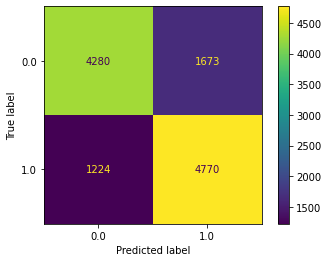

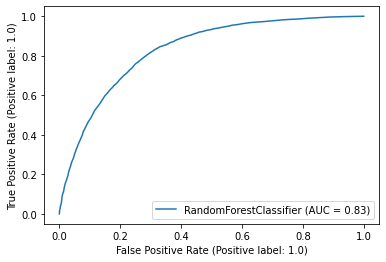

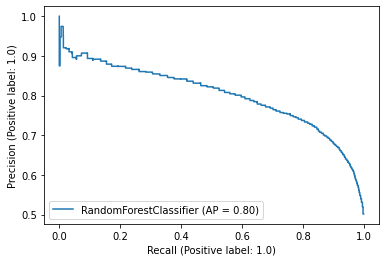

In [ ]:
print("50 50 Dataset RANDOM FOREST CLASSIFIER")
print(random_forest_classifier(X_train_half,X_test_half,y_train_half,y_test_half))

60 40 Dataset RANDOM FOREST CLASSIFIER


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83     11971
         1.0       0.66      0.62      0.64      5949

    accuracy                           0.77     17920
   macro avg       0.74      0.73      0.73     17920
weighted avg       0.76      0.77      0.76     17920



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

None


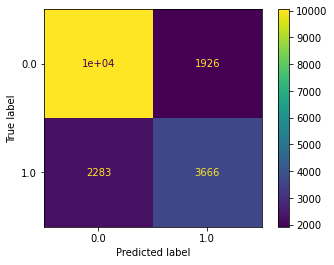

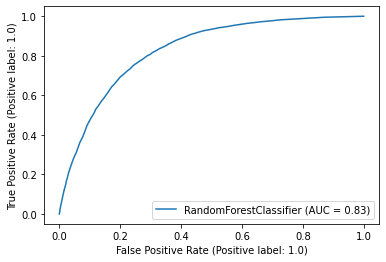

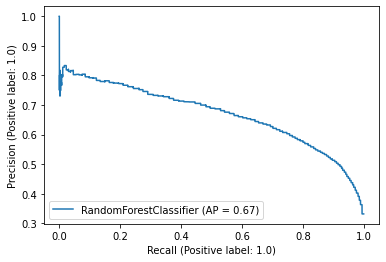

In [ ]:
print("60 40 Dataset RANDOM FOREST CLASSIFIER")
print(random_forest_classifier(X_train_60_40,X_test_60_40,y_train_60_40,y_test_60_40))

Not Imbalance Dataset RANDOM FOREST CLASSIFIER


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      9594
         1.0       0.65      0.62      0.63      4742

    accuracy                           0.76     14336
   macro avg       0.73      0.73      0.73     14336
weighted avg       0.76      0.76      0.76     14336



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

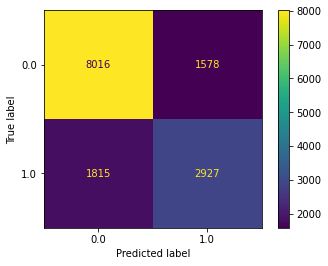

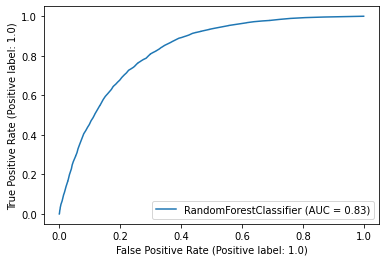

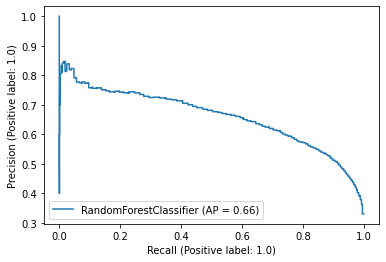

In [ ]:
print("Not Imbalance Dataset RANDOM FOREST CLASSIFIER")
random_forest_classifier(X_train_not_imbalance, X_test_not_imbalance, y_train_not_imbalance, y_test_not_imbalance)

In [ ]:
def ada_boost_classifier(X_train,X_test,y_train,y_test):
  ada = AdaBoostClassifier().fit(X_train, y_train)
  y_pred = ada.predict(X_test)
  print(classification_report(y_test,y_pred))
  plot_confusion_matrix(ada , X_test , y_test)
  plot_roc_curve(ada , X_test , y_test)
  plot_precision_recall_curve(ada , X_test , y_test)

Imbalanced Dataset ADA BOOST CLASSIFIER


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     57484
         1.0       0.52      0.15      0.23      5936

    accuracy                           0.91     63420
   macro avg       0.72      0.57      0.59     63420
weighted avg       0.88      0.91      0.88     63420



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

None


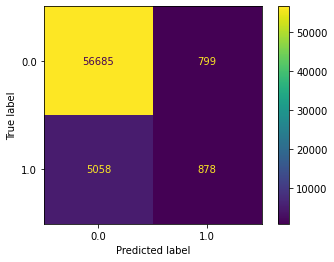

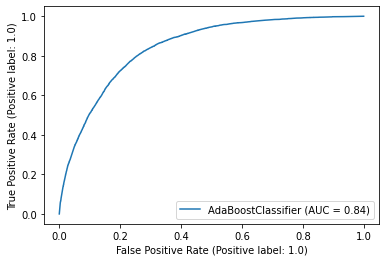

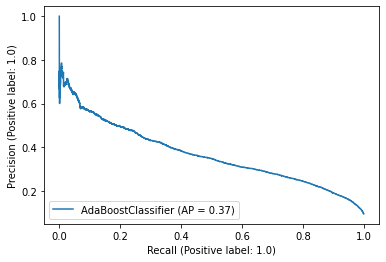

In [ ]:
print("Imbalanced Dataset ADA BOOST CLASSIFIER")
print(ada_boost_classifier(X_train_imbalance,X_test_imbalance,y_train_imbalance,y_test_imbalance))

50 50 Dataset ADA BOOST CLASSIFIER


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76      5953
         1.0       0.76      0.79      0.77      5994

    accuracy                           0.77     11947
   macro avg       0.77      0.77      0.77     11947
weighted avg       0.77      0.77      0.77     11947



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

None


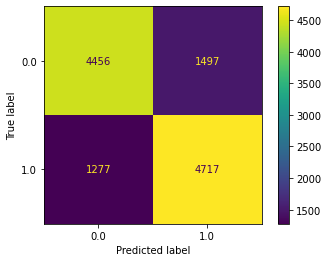

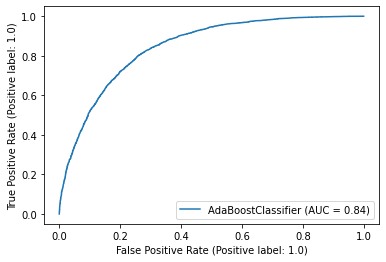

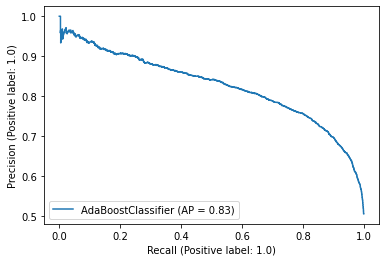

In [ ]:
print("50 50 Dataset ADA BOOST CLASSIFIER")
print(ada_boost_classifier(X_train_half,X_test_half,y_train_half,y_test_half))

60 40 Dataset ADA BOOST CLASSIFIER


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84     11971
         1.0       0.69      0.60      0.64      5949

    accuracy                           0.78     17920
   macro avg       0.75      0.73      0.74     17920
weighted avg       0.77      0.78      0.77     17920



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

None


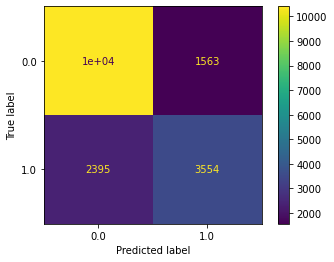

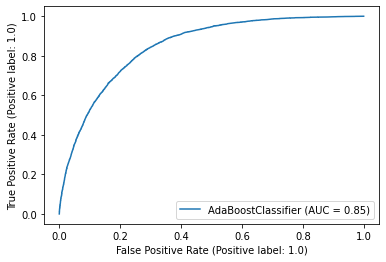

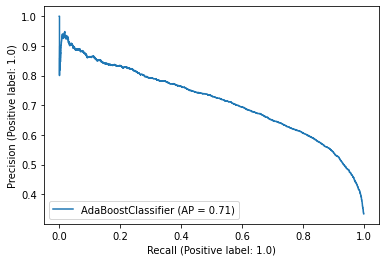

In [ ]:
print("60 40 Dataset ADA BOOST CLASSIFIER")
print(ada_boost_classifier(X_train_60_40,X_test_60_40,y_train_60_40,y_test_60_40))

Not Imbalance Dataset ADA BOOST CLASSIFIER


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      9594
         1.0       0.69      0.60      0.64      4742

    accuracy                           0.78     14336
   macro avg       0.75      0.73      0.74     14336
weighted avg       0.77      0.78      0.77     14336



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

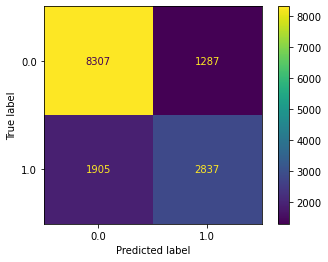

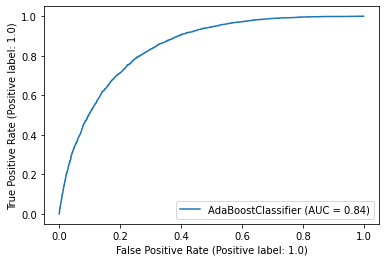

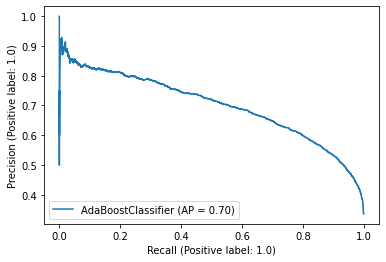

In [ ]:
print("Not Imbalance Dataset ADA BOOST CLASSIFIER")
ada_boost_classifier(X_train_not_imbalance, X_test_not_imbalance, y_train_not_imbalance, y_test_not_imbalance)

In [ ]:
def bagging_classifier(X_train,X_test,y_train,y_test):
  bag_model = BaggingClassifier(
  base_estimator=DecisionTreeClassifier(), 
  n_estimators=100, 
  bootstrap=True,
  oob_score=True,
  random_state=0
  )
  bag_model.fit(X_train, y_train)
  bag_model.oob_score_
  test = bag_model.score(X_test, y_test)
  print(test)

In [ ]:
print("Imbalanced Dataset BAGGING CLASSIFIER")
print(bagging_classifier(X_train_imbalance,X_test_imbalance,y_train_imbalance,y_test_imbalance))

Imbalanced Dataset BAGGING CLASSIFIER


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8987070324818669
None


In [ ]:
print("50 50 Dataset BAGGING CLASSIFIER")
print(bagging_classifier(X_train_half,X_test_half,y_train_half,y_test_half))

50 50 Dataset BAGGING CLASSIFIER


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7474679835942077
None


In [ ]:
print("60 40 Dataset BAGGING CLASSIFIER")
print(bagging_classifier(X_train_60_40,X_test_60_40,y_train_60_40,y_test_60_40))

60 40 Dataset BAGGING CLASSIFIER


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7578125
None


In [ ]:
print("Not Imbalance Dataset BAGGING CLASSIFIER")
bagging_classifier(X_train_not_imbalance, X_test_not_imbalance, y_train_not_imbalance, y_test_not_imbalance)

Not Imbalance Dataset BAGGING CLASSIFIER


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7513253348214286
